In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import  pyp.ObjectDetection.Draw as draw

# dataset 
img_files = {
    "small": "/home/wen/SLAM/Datasets/data/left/1639379422819902564.png",
    "wide": "/home/wen/SLAM/Datasets/data/wide/1639379422906310793.png"
}
small_image, wide_image = cv2.imread(img_files["small"]), cv2.imread(img_files["wide"])

# wide_image = wide_image[180:300, 180:300]
wide_image = cv2.resize(wide_image, small_image.shape[:2])
small_image_gray, wide_image_gray = cv2.cvtColor(small_image, cv2.COLOR_BGR2GRAY) , cv2.cvtColor(wide_image, cv2.COLOR_BGR2GRAY)

2 2


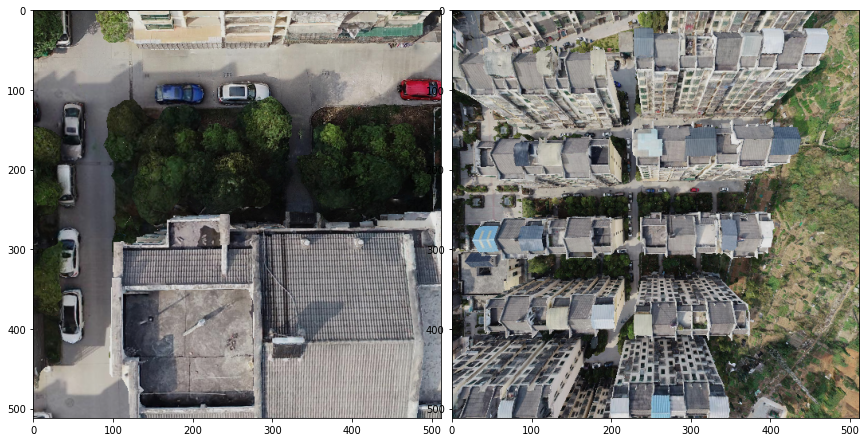

In [2]:
draw.pltshow([small_image, wide_image])

1 1


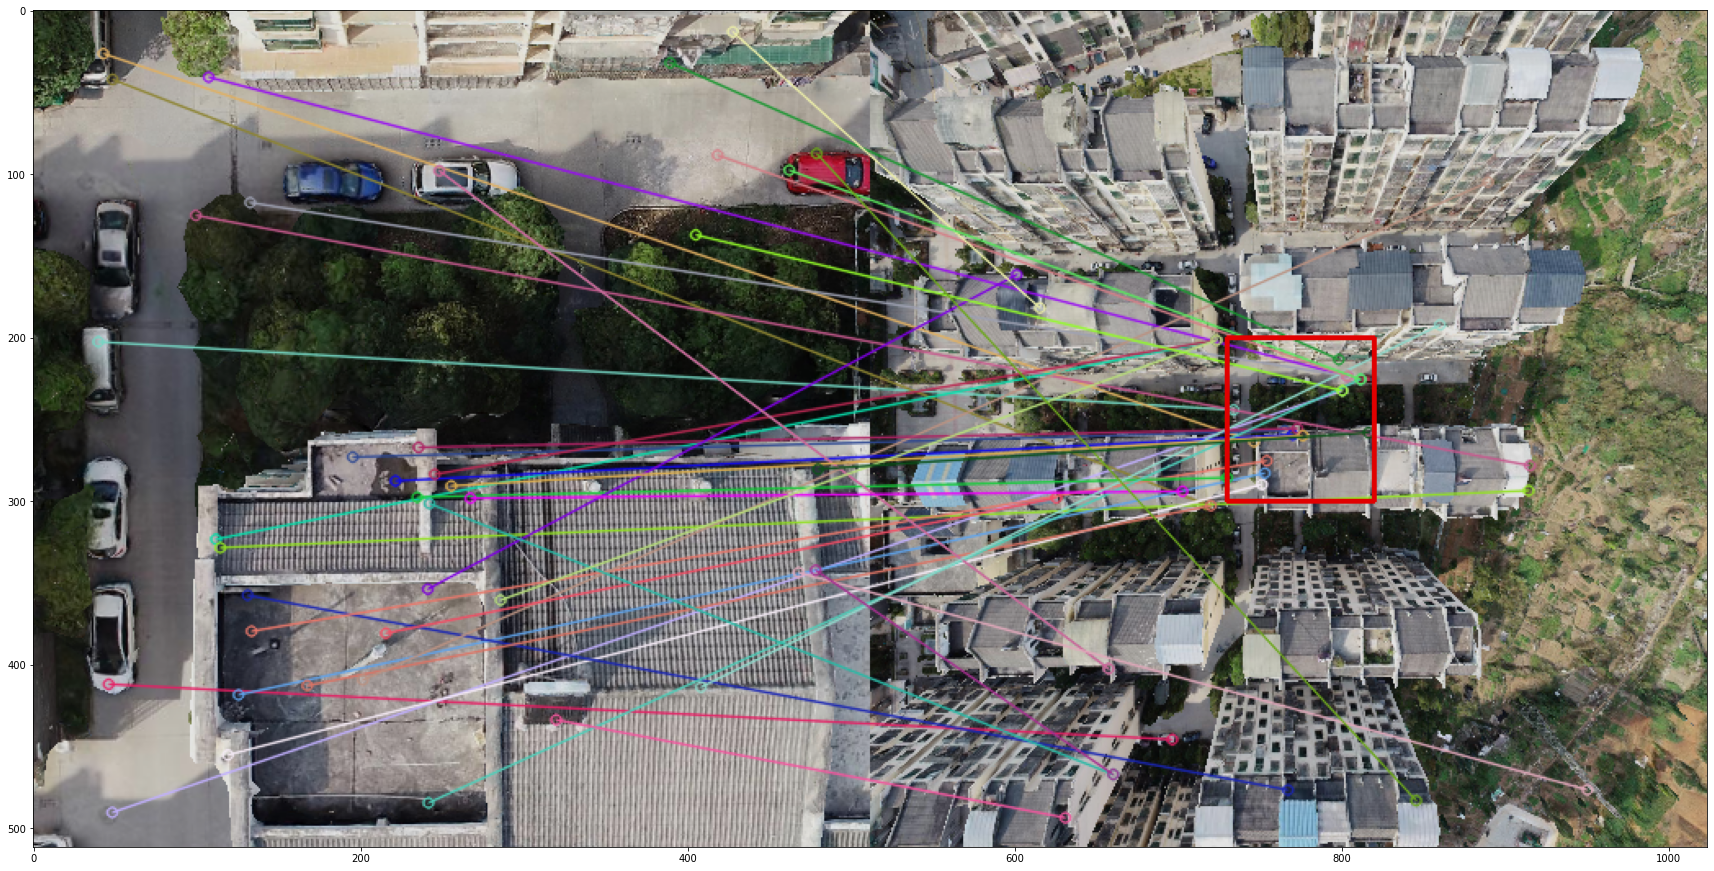

<Figure size 432x288 with 0 Axes>

In [14]:
def extract(img, num, method = "ORB"):
    if method == "SIFT":
        sift = cv2.xfeatures2d.SIFT_create(num)
        kps, deps = sift.detectAndCompute(img, None)
        return kps, deps
    elif method == "ORB":
        orb = cv2.ORB_create(num)
        kps, deps = orb.detectAndCompute(img, None)
    return kps, deps

n_points = 2000
method = "SIFT"
matcher = cv2.BFMatcher() if method != "ORB" else cv2.BFMatcher(cv2.NORM_HAMMING2)
kps1, des1 = extract(small_image_gray, n_points, method)
kps2, des2 = extract(wide_image_gray, n_points, method)


def match(des1,  des2, matcher):
    matches = matcher.knnMatch(des1,des2, k=2)
    good = []
    for m,n in matches:
        if m.distance < 0.80*n.distance:
            good.append(m)
    return good
match_res = match(des1,des2, matcher)
match_image = cv2.drawMatches(small_image, kps1, wide_image, kps2, match_res, None, [-1,-1,-1], [0,0,0],None, cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
match_image = cv2.rectangle(match_image, (730, 200 ), (820, 300) , [0,0,225], 2)
draw.pltshow([match_image], size = [30,30])
# plt.imshow(cv2.cvtColor(match_image,))
plt.savefig("a.png")

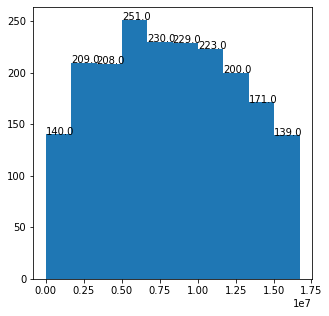

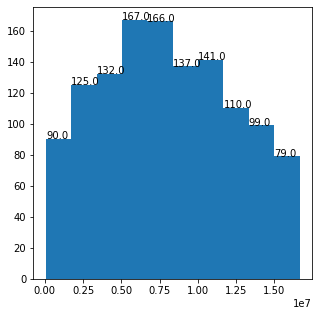

In [15]:
# 绘制 两张图乡 金字塔的分布
def draw_pyramid_distribution(kps):
    from collections import Counter
    levels = [ kp.octave for kp in kps]
    fig = plt.figure(figsize=(5,5))
    ax  = plt.gca()
    arr =ax.hist(levels)
    for i in range(len(arr[0])):
        plt.text(arr[1][i],arr[0][i],str(arr[0][i]))
    plt.show()
ret1 = draw_pyramid_distribution(kps2)
ret2 = draw_pyramid_distribution(kps1)

Text(0.5, 1.0, 'Distribution of keypoint size (total 1246)')

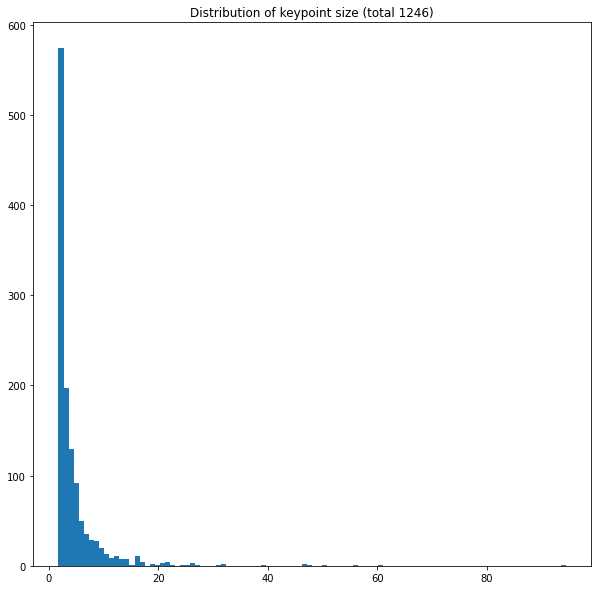

In [13]:
sizes = [kp.size for kp in kps1 if kp.size  > 0]
plt.figure(figsize=(10,10))
plt.hist(sizes, bins=100)
plt.title("Distribution of keypoint size (total {})".format(len(sizes)))

In [8]:
size_thres = 10
sub_kps = [kp for kp in kps1 if kp.size > size_thres]
sub_indexs = [i for i, kp in enumerate(kps1) if kp.size > size_thres]
subdesp1 = deps1[sub_indexs]


1 1


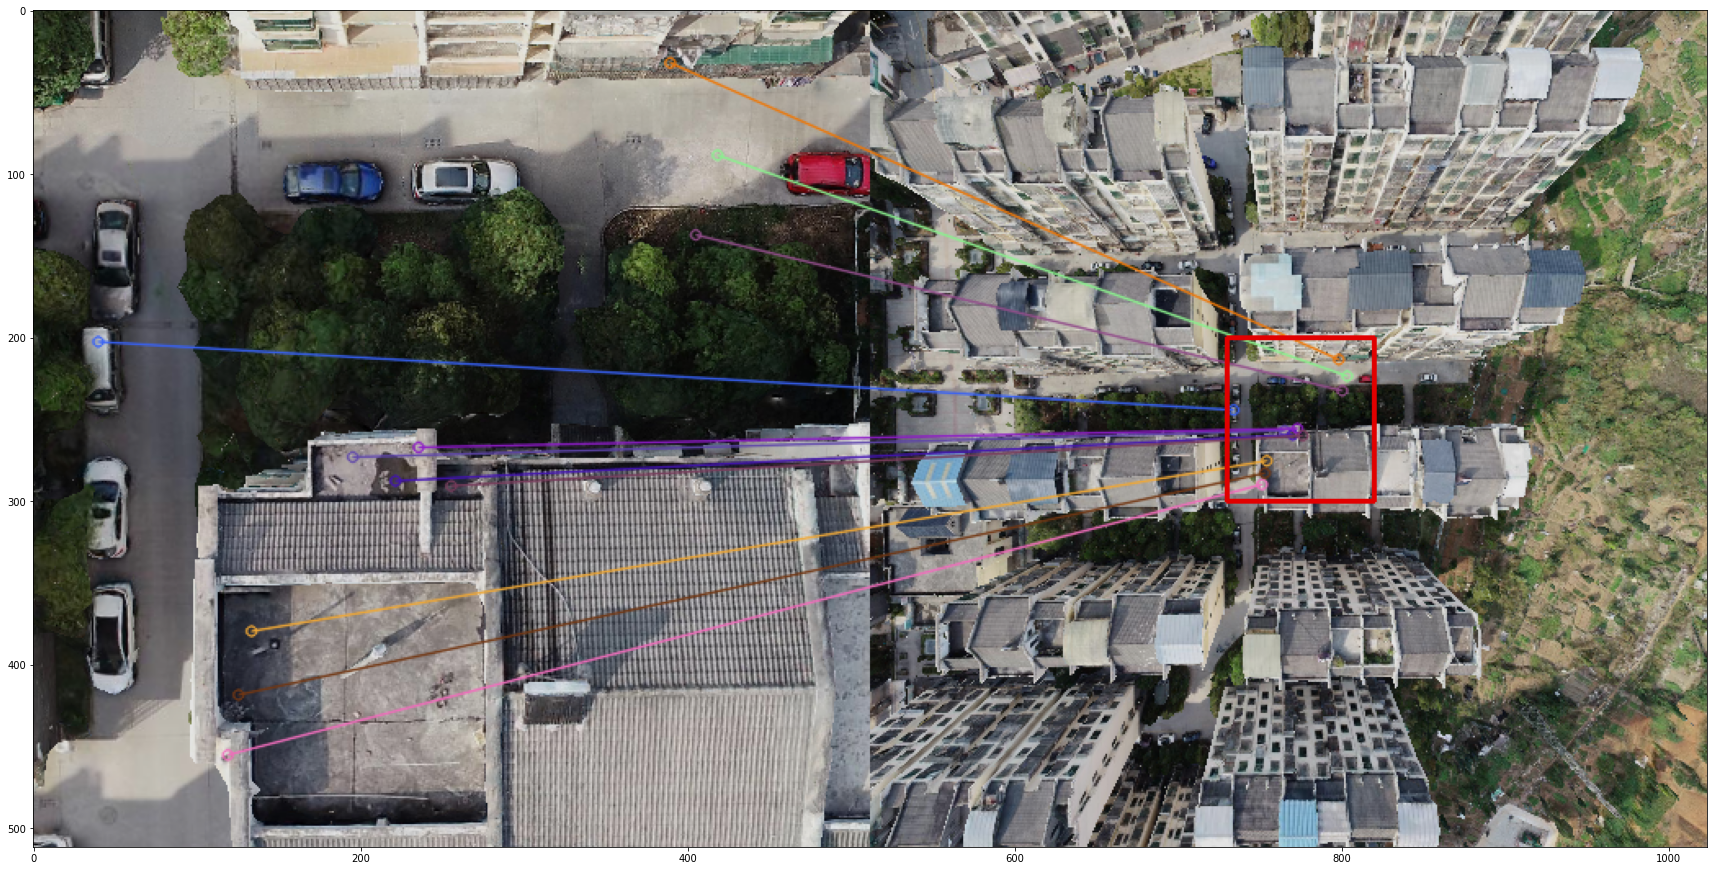

In [9]:
match_res = match(subdesp1,deps2, matcher)
match_image = cv2.drawMatches(small_image, sub_kps, wide_image, kps2, match_res, None, [-1,-1,-1], [0,0,0],None, cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
match_image = cv2.rectangle(match_image, (730, 200 ), (820, 300) , [0,0,225], 2)
draw.pltshow([match_image], size = [30,30])